# Retificador de meia onda (Carga R/L)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 30.807681626263992 
Vrms: 	 50.000000000000014
# - Corrente na carga - # 
Ipk: 	 0.9376963717766362 
Im: 	 0.30807681629562716 
Irms: 	 0.4735832103525881
# - Potências - # 
Ppk:	 90.87668821712738 
P: 	 22.428105711520367 
S: 	 33.48738994964102
# - Fatores - # 
FP:	 0.6697477989550151 
THD V:	 0.9891615932437157 
THD I:	 1.0034048648938387


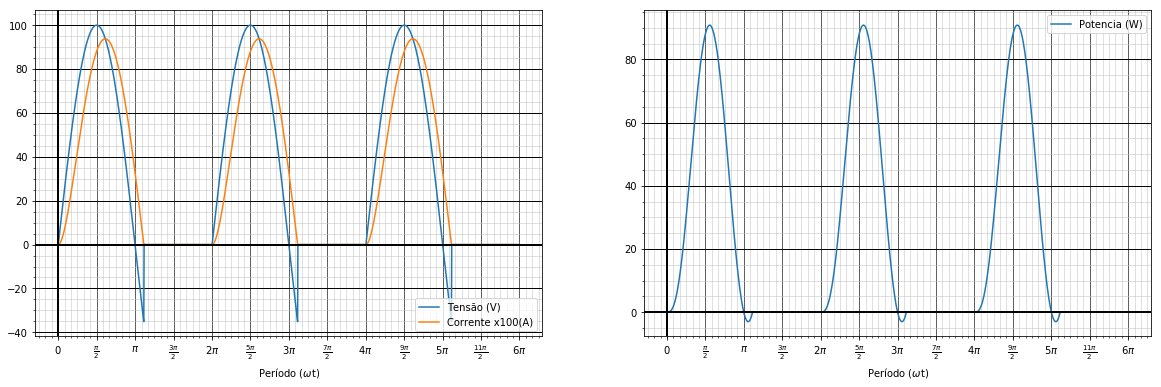

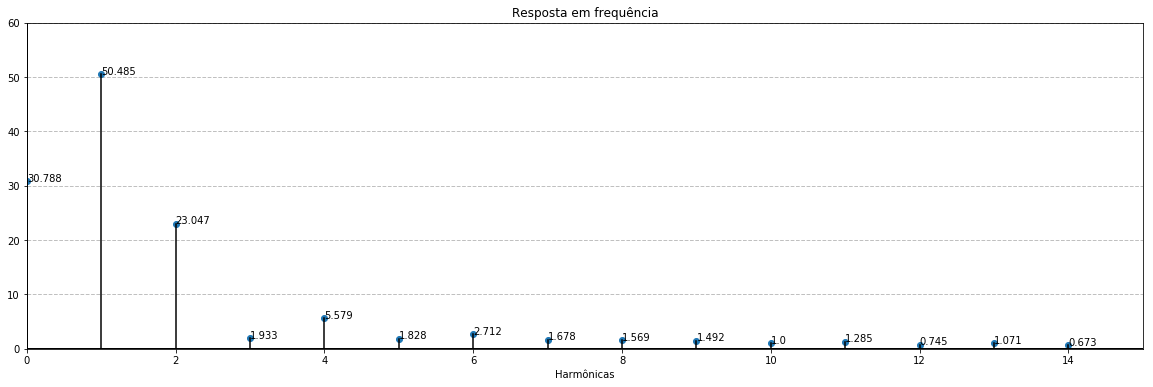

In [2]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/L ###################

V_pk = 100
Freq = 60
R = 100
L = 0.1
T = 2*pi

w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
#(r, phi) = polar(z)
tal = L/R

a = 0

ab = calculo_ab(f'(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))', pi, 'scipy')
b = ab[0]

func_v = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'({V_pk}/{Z})*(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)